# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
1. Mouse l509 had a net decrease in tumor volume from timepoint 0 to 45 during its Capomulin treatment.
2. For the entire Capomulin regimine, the correlation coeffecient betwen mouse weight and tumor volume is .841 which means as the weight of the mouse increases, so does the tumor volume. This could mean that the tumor contributes to the overall weight of the mouse as the tumor gets larger.
3. Ramicane and Capomulin yielded overall lower tumor volumes than Infubinol and Ceftamin.

 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame inner join
merge = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
merge.head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [3]:
# Checking the number of mice.
merge["Mouse ID"].nunique()


249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
merge
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint
duplicates = merge[merge.duplicated(['Mouse ID', 'Timepoint'], keep=False)]
dup = duplicates["Mouse ID"].unique()
dup



array(['g989'], dtype=object)

In [5]:
#displaying number of mouseIDs after removal of duplicate.
mouseSheet = merge[~merge['Mouse ID'].isin(dup)]
mouseSheet["Mouse ID"].nunique()

248

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

# Assemble the resulting series into a single summary DataFrame.

byDrug = mouseSheet.groupby("Drug Regimen")
drugBuilder = {'mean': byDrug['Tumor Volume (mm3)'].mean() , 
               'median': byDrug['Tumor Volume (mm3)'].median() , 
               'variance': byDrug['Tumor Volume (mm3)'].var(), 
               'standard deviation': byDrug['Tumor Volume (mm3)'].std(), 
               'Std. Err.': byDrug['Tumor Volume (mm3)'].sem()
               }
drugSummary = pd.DataFrame(drugBuilder)
drugSummary

,mean,median,variance,standard deviation,Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# Of Observed Mouse Timepoints'>

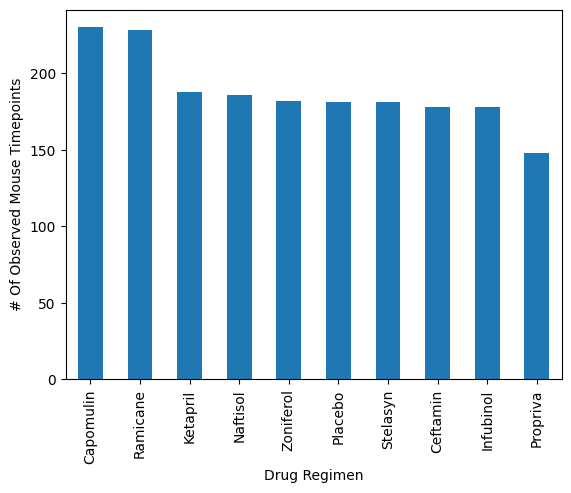

In [21]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
kanye = mouseSheet.groupby("Drug Regimen")["Timepoint"].count()
kanye.reset_index()
kanye = kanye.sort_values(ascending=False)
kanye.plot(kind="bar", x="Drug Regimen", y="Timepoint", xlabel="Drug Regimen", ylabel="# Of Observed Mouse Timepoints")


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Capomulin'),
  Text(1, 0, 'Ramicane'),
  Text(2, 0, 'Ketapril'),
  Text(3, 0, 'Naftisol'),
  Text(4, 0, 'Zoniferol'),
  Text(5, 0, 'Placebo'),
  Text(6, 0, 'Stelasyn'),
  Text(7, 0, 'Ceftamin'),
  Text(8, 0, 'Infubinol'),
  Text(9, 0, 'Propriva')])

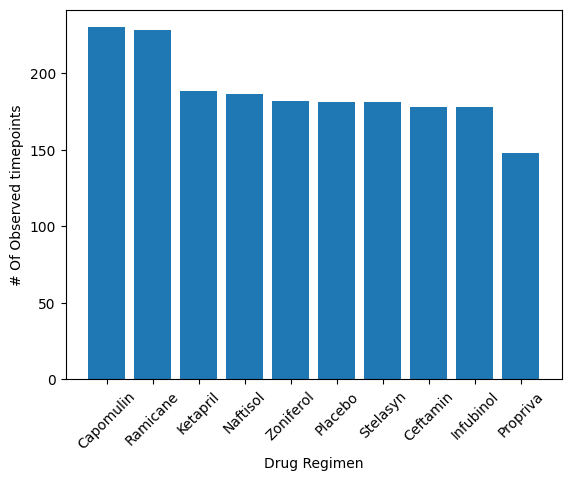

In [22]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(kanye.index, kanye.values)
plt.xlabel("Drug Regimen")
plt.ylabel("# Of Observed timepoints")
plt.xticks(rotation=45)


<Axes: ylabel='Sex'>

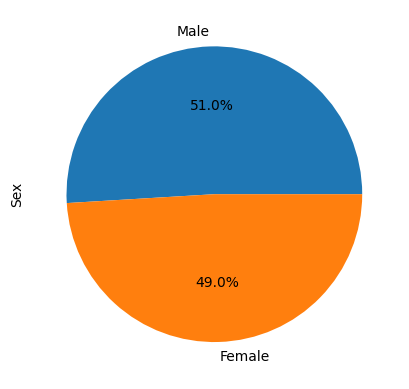

In [24]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex = mouseSheet["Sex"].value_counts()
sex.plot(kind='pie', autopct='%1.1f%%', ylabel='Sex')

Text(0, 0.5, 'Sex')

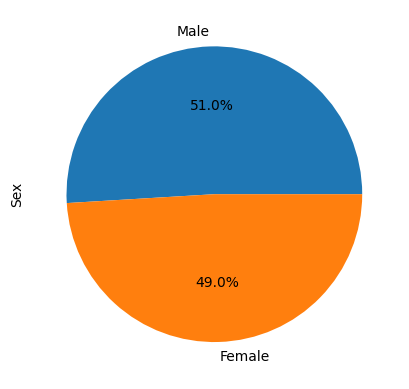

In [25]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex, labels=["Male", "Female"], autopct='%1.1f%%')
plt.ylabel('Sex')


## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
supreme = mouseSheet.groupby("Mouse ID")["Timepoint"].max()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
supremeLeader = pd.merge(supreme, mouseSheet, on=["Mouse ID", "Timepoint"], how="inner")
supremeLeader

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [13]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)
tumor = []
# Locate the rows which contain mice on each drug and get the tumor volumes
for x in drugs:
    dfDrug = supremeLeader.loc[supremeLeader["Drug Regimen"] == x, "Tumor Volume (mm3)"]
    tumor.append(dfDrug)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    Q1 = dfDrug.quantile(0.25)
    Q3 = dfDrug.quantile(0.75)
    IQR = Q3 - Q1   

    # add subset 


    # Determine outliers using upper and lower bounds
    lb = Q1 - (1.5*IQR)
    ub = Q3 + (1.5*IQR)
    print(f"{x}'s potential outliers: {dfDrug.loc[(dfDrug > ub) | (dfDrug < lb)]}")
    

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


Text(0, 0.5, 'Final Tumor Volume (mm3)')

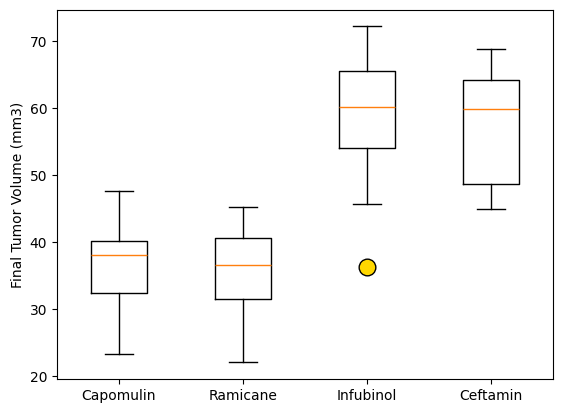

In [14]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor, labels=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'],
            flierprops=dict(marker='o', markerfacecolor='gold', markersize=12))
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.ylabel('Final Tumor Volume (mm3)')

## Line and Scatter Plots

Text(0.5, 1.0, 'Capomulin treatment of mouse l509')

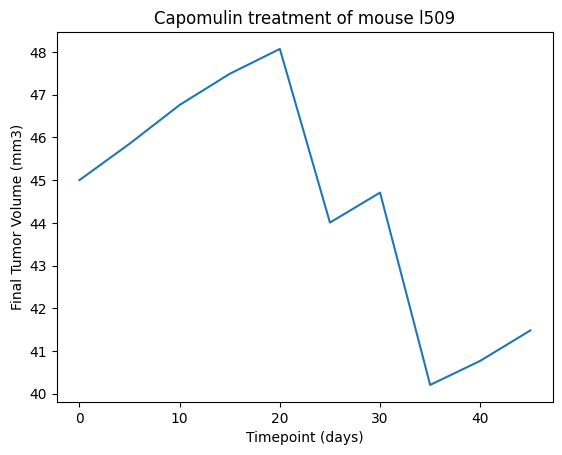

In [27]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouseStalker = mouseSheet.loc[mouseSheet['Drug Regimen'] == "Capomulin"]
mouseStalker
plt.plot(mouseSheet.loc[mouseSheet['Mouse ID'] == "l509", 'Timepoint'],
          mouseSheet.loc[mouseSheet['Mouse ID'] == "l509", 'Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Final Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse l509')


Text(0, 0.5, 'Average Tumor Volume (mm3)')

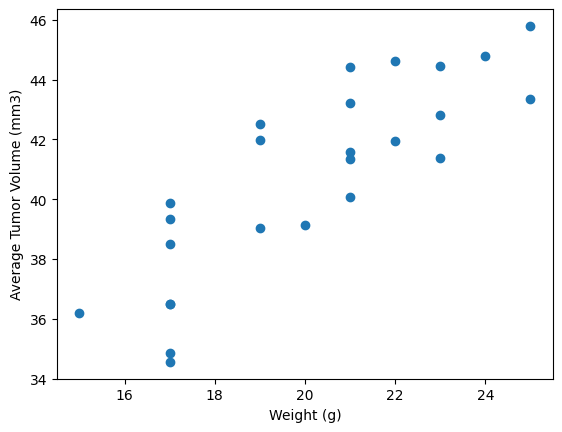

In [16]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
mouseStalker = mouseSheet.loc[mouseSheet['Drug Regimen'] == "Capomulin"]
voume = mouseStalker.groupby(['Mouse ID'])[['Tumor Volume (mm3)', 'Weight (g)']].mean()
plt.scatter(voume['Weight (g)'], voume['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

## Correlation and Regression

In [17]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
coCoeff = voume['Weight (g)'].corr( voume['Tumor Volume (mm3)'])
coCoeff

0.8419363424694722

Text(0, 0.5, 'Average Tumor Volume (mm3)')

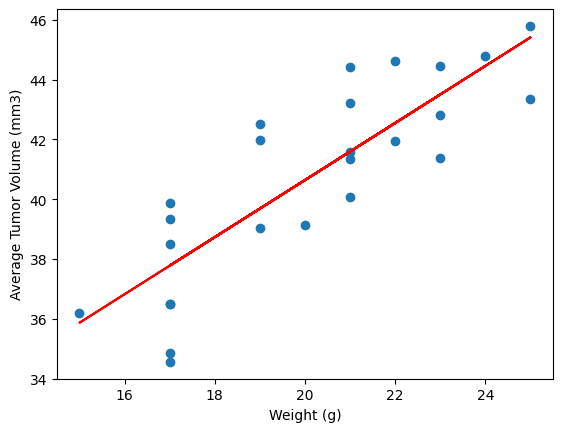

In [18]:
#plotting linear regression model
slope, intercept, r_value, p_value, std_err = st.linregress(voume['Weight (g)'], voume['Tumor Volume (mm3)'])
plt.scatter(voume['Weight (g)'], voume['Tumor Volume (mm3)'])
plt.plot(voume['Weight (g)'], slope*voume['Weight (g)'] + intercept, color='red', label='Regression Line')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')